<a href="https://colab.research.google.com/github/Jasmi1803/Reservation/blob/main/Reservation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/My Drive/dataset/train (1).csv')
df1=pd.read_csv('/content/drive/My Drive/dataset/test (1).csv')

In [ ]:
df

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42095,42095,3,0,0,4,0,0,1,160,2018,12,30,1,0,0,0,140.00,2,1
42096,42096,2,0,0,3,0,0,0,34,2017,9,23,0,0,0,0,224.67,0,0
42097,42097,2,0,0,2,2,0,0,292,2018,7,21,0,0,0,0,96.00,0,0
42098,42098,1,0,0,3,0,0,0,5,2018,11,9,0,0,0,0,120.00,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [ ]:
df.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
X = df.drop(columns=['id','booking_status'])
Y = df[['booking_status']]

In [ ]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [ ]:
Y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization


In [ ]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=xtrain.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2304      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
h=model.fit(xtrain,ytrain,epochs=20)

Epoch 1/20
1053/1053 [==============================] - 5s 3ms/step - loss: 0.6085 - accuracy: 0.6900
Epoch 2/20
1053/1053 [==============================] - 3s 3ms/step - loss: 0.5199 - accuracy: 0.7474
Epoch 3/20
1053/1053 [==============================] - 5s 5ms/step - loss: 0.5050 - accuracy: 0.7579
Epoch 4/20
1053/1053 [==============================] - 5s 5ms/step - loss: 0.5001 - accuracy: 0.7617
Epoch 5/20
1053/1053 [==============================] - 5s 5ms/step - loss: 0.4954 - accuracy: 0.7665
Epoch 6/20
1053/1053 [==============================] - 5s 5ms/step - loss: 0.4962 - accuracy: 0.7662
Epoch 7/20
1053/1053 [==============================] - 3s 3ms/step - loss: 0.4890 - accuracy: 0.7684
Epoch 8/20
1053/1053 [==============================] - 3s 3ms/step - loss: 0.4882 - accuracy: 0.7739
Epoch 9/20
1053/1053 [==============================] - 3s 3ms/step - loss: 0.4883 - accuracy: 0.7723
Epoch 10/20
1053/1053 [==============================] - 3s 3ms/step - loss: 0.488

In [ ]:
model.evaluate(xtrain, ytrain)

1053/1053 [==============================] - 2s 2ms/step - loss: 0.8516 - accuracy: 0.6483


[0.8516035079956055, 0.6483373045921326]

In [ ]:
yprob_tr = model.predict(xtrain)
yprob_ts = model.predict(xtest)

264/264 [==============================] - 0s 1ms/step


In [ ]:
ypred_ts = []
for i in yprob_ts:
    if i>=0.5:
        ypred_ts.append(1)
    else:
        ypred_ts.append(0)

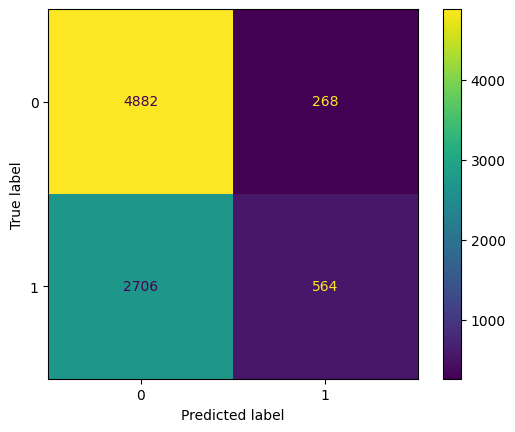

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.64      0.95      0.77      5150
           1       0.68      0.17      0.27      3270

    accuracy                           0.65      8420
   macro avg       0.66      0.56      0.52      8420
weighted avg       0.66      0.65      0.58      8420



In [ ]:
import pickle
pickle_out=open("model.pkl","wb")
pickle.dump(model,pickle_out)
pickle_out.close()

In [ ]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.6/188.6 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 32.6 MB/s eta 0:00:00
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzlocal-5.0.1:
      Successfully uninstalled tzlocal-5.0.1


In [ ]:
import streamlit as st

st.write('Hello world!')

2023-09-05 15:41:34.737 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py [ARGUMENTS]


In [ ]:
import streamlit as st
import tensorflow as tf

In [ ]:
@st.cache(allow_output_mutation=True)
def load_model():
    model = tf.keras.models.load_model('your_model_path')
    return model

model = load_model()

InternalHashError: ignored